<a href="https://colab.research.google.com/github/mjgpinheiro/Econophysics/blob/main/Breakout_Trading_Strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:4 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:5 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
build-essential is already the newest version (12.9ubuntu3).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Reading packa

[*********************100%%**********************]  1 of 1 completed
<ipython-input-3-4385bb93998e>:139: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Portfolio Value'].iloc[i] = portfolio_value
<ipython-input-3-4385bb93998e>:140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Position'].iloc[i] = position


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51

    accuracy                           1.00        51
   macro avg       1.00      1.00      1.00        51
weighted avg       1.00      1.00      1.00        51

Accuracy: 1.0


<ipython-input-3-4385bb93998e>:139: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Portfolio Value'].iloc[i] = portfolio_value
<ipython-input-3-4385bb93998e>:140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Position'].iloc[i] = position
<ipython-input-3-4385bb93998e>:139: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Portfolio Value'].iloc[i] = portfolio_value
<ipython-input-3-4385bb93998e>:140: Set

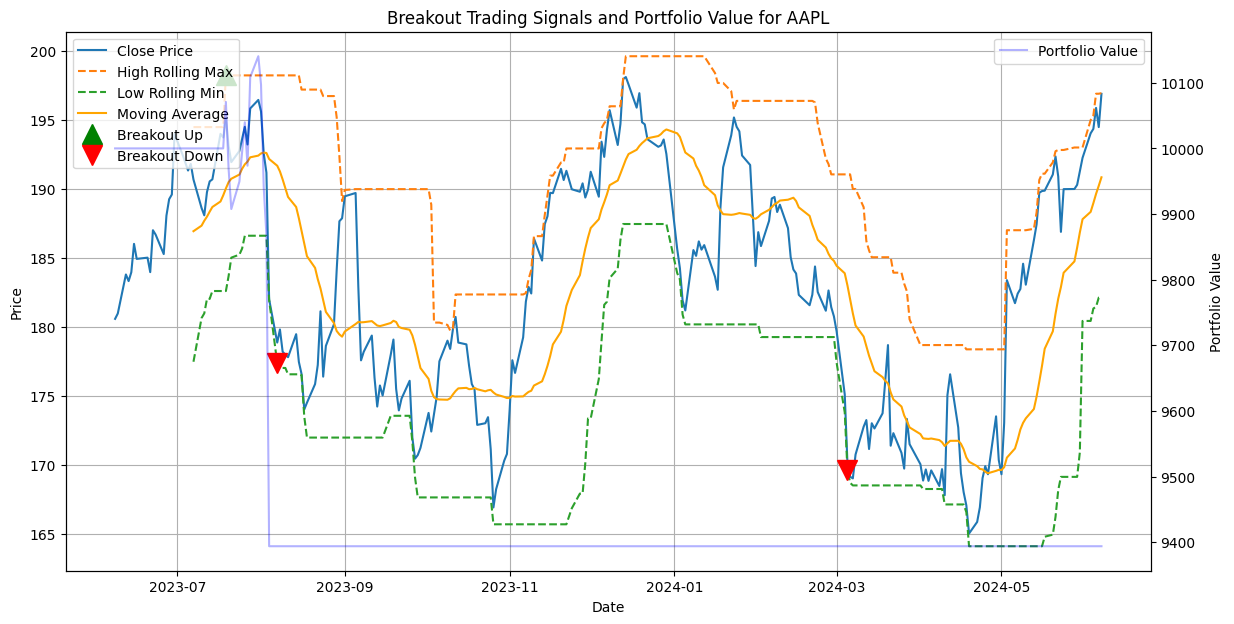

In [3]:
# Install system dependencies for TA-Lib
!apt-get update
!apt-get install -y build-essential
!apt-get install -y libta-lib0 libta-lib0-dev
# Download and compile TA-Lib
!pip install ta-lib
!pip install yfinance pandas matplotlib pandas_ta scikit-learn

!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
%cd ..

# Install the Python wrapper for TA-Lib
!pip install ta-lib

# Install other necessary packages
!pip install yfinance pandas matplotlib pandas_ta scikit-learn

# Install TA-Lib Python wrapper and other necessary packages
!pip install yfinance pandas matplotlib pandas_ta scikit-learn

# Install necessary packages
!apt-get update
!apt-get install -y build-essential
!apt-get install -y libta-lib0 libta-lib0-dev
!pip install ta-lib
!pip install yfinance pandas matplotlib pandas_ta scikit-learn

# Install necessary packages
!apt-get update
!apt-get install -y build-essential
!apt-get install -y libta-lib0 libta-lib0-dev
!pip install ta-lib
!pip install yfinance pandas matplotlib pandas_ta scikit-learn

# Import necessary libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import pandas_ta as ta
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer
import talib

# Function to download stock data
def get_stock_data(ticker, period='1y', interval='1d'):
    stock_data = yf.download(ticker, period=period, interval=interval)
    return stock_data

# Function to calculate technical indicators and candlestick patterns
def add_indicators(stock_data):
    stock_data['RSI'] = talib.RSI(stock_data['Close'], timeperiod=14)
    stock_data['MA'] = talib.SMA(stock_data['Close'], timeperiod=20)
    stock_data['ATR'] = talib.ATR(stock_data['High'], stock_data['Low'], stock_data['Close'], timeperiod=14)
    stock_data['Hammer'] = talib.CDLHAMMER(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close'])
    stock_data['ShootingStar'] = talib.CDLSHOOTINGSTAR(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close'])
    stock_data['Engulfing'] = talib.CDLENGULFING(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close'])
    return stock_data

# Function to detect breakouts
def detect_breakout(stock_data, window=20, volume_multiplier=1.5):
    stock_data['High Roll Max'] = stock_data['High'].rolling(window=window).max()
    stock_data['Low Roll Min'] = stock_data['Low'].rolling(window=window).min()
    stock_data['Volume Avg'] = stock_data['Volume'].rolling(window=window).mean()

    stock_data['Breakout Up'] = (stock_data['Close'] > stock_data['High Roll Max'].shift(1)) & \
                                (stock_data['Volume'] > volume_multiplier * stock_data['Volume Avg']) & \
                                (stock_data['Close'] > stock_data['MA']) & \
                                (stock_data['RSI'] > 70) & \
                                (stock_data['Close'] - stock_data['Low Roll Min'] > stock_data['ATR'])

    stock_data['Breakout Down'] = (stock_data['Close'] < stock_data['Low Roll Min'].shift(1)) & \
                                  (stock_data['Volume'] > volume_multiplier * stock_data['Volume Avg']) & \
                                  (stock_data['Close'] < stock_data['MA']) & \
                                  (stock_data['RSI'] < 30) & \
                                  (stock_data['High Roll Max'] - stock_data['Close'] > stock_data['ATR'])

    return stock_data

# Function to create features for machine learning
def create_features(stock_data):
    features = stock_data[['Close', 'Volume', 'RSI', 'MA', 'ATR', 'Hammer', 'ShootingStar', 'Engulfing']].copy()
    features['Breakout Up'] = stock_data['Breakout Up'].shift(-1).fillna(False)
    features['Breakout Down'] = stock_data['Breakout Down'].shift(-1).fillna(False)
    features = features.fillna(method='ffill')  # Forward fill
    return features

# Function to train and test machine learning model
def train_ml_model(features):
    X = features.drop(['Breakout Up', 'Breakout Down'], axis=1)
    y = features['Breakout Up'].astype(int) - features['Breakout Down'].astype(int)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Handling missing values
    imputer = SimpleImputer(strategy='median')
    X_train = imputer.fit_transform(X_train)
    X_test = imputer.transform(X_test)

    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

    return model, imputer

# Function to backtest the breakout strategy with ML model
def backtest_breakout_ml(stock_data, model, imputer, initial_cash=10000):
    position = 0
    cash = initial_cash
    portfolio_value = initial_cash
    stock_data['Portfolio Value'] = initial_cash
    stock_data['Position'] = 0

    for i in range(1, len(stock_data)):
        features = stock_data.iloc[i][['Close', 'Volume', 'RSI', 'MA', 'ATR', 'Hammer', 'ShootingStar', 'Engulfing']].values.reshape(1, -1)
        features = pd.DataFrame(features, columns=['Close', 'Volume', 'RSI', 'MA', 'ATR', 'Hammer', 'ShootingStar', 'Engulfing'])
        features = features.fillna(method='ffill')  # Forward fill
        features = imputer.transform(features)  # Impute remaining NaNs with median
        signal = model.predict(features)

        if signal == 1 and position == 0:
            position = cash / stock_data['Close'].iloc[i]
            cash = 0
        elif signal == -1 and position > 0:
            cash = position * stock_data['Close'].iloc[i]
            position = 0

        portfolio_value = cash + position * stock_data['Close'].iloc[i]
        stock_data['Portfolio Value'].iloc[i] = portfolio_value
        stock_data['Position'].iloc[i] = position

    return stock_data

# Function to plot breakout signals and portfolio value
def plot_breakout(stock_data, ticker):
    fig, ax1 = plt.subplots(figsize=(14, 7))

    ax1.plot(stock_data['Close'], label='Close Price')
    ax1.plot(stock_data['High Roll Max'], label='High Rolling Max', linestyle='--')
    ax1.plot(stock_data['Low Roll Min'], label='Low Rolling Min', linestyle='--')
    ax1.plot(stock_data['MA'], label='Moving Average', linestyle='-', color='orange')

    ax1.plot(stock_data[stock_data['Breakout Up']].index,
             stock_data['High Roll Max'][stock_data['Breakout Up']],
             '^', markersize=15, color='g', lw=0, label='Breakout Up')
    ax1.plot(stock_data[stock_data['Breakout Down']].index,
             stock_data['Low Roll Min'][stock_data['Breakout Down']],
             'v', markersize=15, color='r', lw=0, label='Breakout Down')

    ax1.set_xlabel('Date')
    ax1.set_ylabel('Price')
    ax1.legend(loc='upper left')
    ax1.grid()

    ax2 = ax1.twinx()
    ax2.plot(stock_data['Portfolio Value'], label='Portfolio Value', color='blue', alpha=0.3)
    ax2.set_ylabel('Portfolio Value')
    ax2.legend(loc='upper right')

    plt.title(f'Breakout Trading Signals and Portfolio Value for {ticker}')
    plt.show()

# Main function
def main():
    # Define the stock ticker and period
    ticker = 'AAPL'  # Example ticker
    period = '1y'    # Period can be '1y', '6mo', '1mo', etc.
    interval = '1d'  # Can be '1d', '1h', '5m', etc.

    # Get stock data
    stock_data = get_stock_data(ticker, period, interval)

    # Add technical indicators and candlestick patterns
    stock_data = add_indicators(stock_data)

    # Detect breakout with filters
    stock_data = detect_breakout(stock_data)

    # Create features for machine learning
    features = create_features(stock_data)

    # Train machine learning model
    model, imputer = train_ml_model(features)

    # Backtest breakout strategy with ML model
    stock_data = backtest_breakout_ml(stock_data, model, imputer)

    # Plot breakout signals and portfolio value
    plot_breakout(stock_data, ticker)

# Run the main function
if __name__ == "__main__":
    main()
